<h2 align= "center"><b>Client: Sales Effectiveness | Category: Product Sales</b></h2>
<h2 align= "center"><b>Project Ref: PM-PR-0019 | Team id: PTID-CDS-JAN-24-1772</b></h2>


#### **BUSINESS CASE**

FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solutions.  FicZon major leads generation channel is digital and through their website. 

FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales.  

Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation. 

FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

#### PROJECT GOAL:

1. Data exploration insights-Sales effectiveness.
2. ML model to predict the Lead Category (High Potential , Low Potential)


#### **IMPORTING THE REQUIRED LIBRARIES**

In [1]:
# Importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [214]:
import mysql.connector as connector
import os
from dotenv import load_dotenv

#### **IMPORTING THE DATA**

In [4]:
# Loading environment variables from .env file

load_dotenv()

True

In [5]:
# Fetching database connection parameters from environment variables

db_params = {
    'dbname': os.environ.get('DB_NAME'),
    'table': os.environ.get('DB_TABLE_NAME'),
    'host': os.environ.get('DB_HOST'),
    'port': os.environ.get('DB_PORT'),
    'username': os.environ.get('DB_USERNAME'),
    'password': os.environ.get('DB_PASSWORD'),
}

In [6]:
connection = connector.connect(host=db_params['host'], user=db_params['username'], password=db_params['password'], database=db_params['dbname'])

In [7]:
# List of Databases

cursor = connection.cursor()
cursor.execute('show databases')
for database in cursor:
    print(database)

('information_schema',)
('project_sales',)


In [8]:
# List of Tables

db_tables = pd.read_sql_query('show tables', connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [9]:
query = 'select * from data'
output_from_database = pd.read_sql_query(query, connection)
output_from_database

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [10]:
directory = 'data'

if not os.path.exists(directory):
    os.makedirs(directory)

directory_path = os.path.join(directory, 'data.csv')
output_from_database.to_csv(directory_path, index=False)

print(f'Data saved successfully {directory_path}')

Data saved successfully data\data.csv


In [2]:
data= pd.read_csv(r"E:\Lead_quality_categorization_for_enhanced_sales\data\data.csv")
data

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


#### **DOMAIN ANALYSIS**

FicZon Inc is facing a decline in sales due to increased competition. They rely on manual methods to assess lead quality, which is inefficient. By implementing Machine Learning to automatically categorize leads, FicZon aims to enhance their sales process and boost sales performance.

The features and their description include the following:
- **Created -**  Created is date and time on which the lead was generated.
- **Product_ID -** Product_ID is the Serial no. of the product.
- **Source -** Source ,from where the lead has generated like website , phonecall , email etc.
- **Mobile -** Mobile number of the lead or customer
- **EMAIL -** EMAIL of the lead.
- **Sales_Agent -** Sales_Agent is the agent who generated the lead.
- **Location -** Location is the address of the lead / from where the lead has generated.
- **Delivery_Mode -** how the product has deliveried to lead or what type of delivery mode.
- **Status -** Status of current lead .

#### **BASIC CHECKS**

In [5]:
# displaying first five rows
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [6]:
# displaying the last five rows
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [7]:
data.shape # 7422 no of rows, 9 columns

(7422, 9)

In [8]:
# getting basic information such as datatype, null values etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Created        7422 non-null   object 
 1   Product_ID     7364 non-null   float64
 2   Source         7405 non-null   object 
 3   Mobile         5612 non-null   object 
 4   EMAIL          7422 non-null   object 
 5   Sales_Agent    7399 non-null   object 
 6   Location       7364 non-null   object 
 7   Delivery_Mode  7422 non-null   object 
 8   Status         7422 non-null   object 
dtypes: float64(1), object(8)
memory usage: 522.0+ KB


### Insights:
- Created is Datetime Column but it is in Object type ( Convert it into datetime64).
- Product_ID is a integer but it is in float.
- Source  is a String with few missing values.
- Mobile number is an integer but it is in float with missing values .
- EMAIL is string.
- Sales_Agent , Location are objects with missing values.

In [12]:
data.describe()

,Product_ID
count,7364.000000
mean,15.947311
std,6.072937
min,0.000000
25%,12.000000
50%,18.000000
75%,19.000000
max,28.000000


In [11]:
# getting basic statistical information
data.describe(include= "object")

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


### Insights:-
- 25 categories of Source are there but **2547 Leads were generated from Call Source only** .
- Mobile number and EMAIL are not showing any explicit information about leads but shows the information of those who are interested in the products.
- 12 Sales Agents are there but **Sales-Agent-4 alone make 1500 Leads**. Hence it is inferred that he is better than the others.
- 2500 Leads were generated from other locations .
- There are 5 different ways to deliver products but Mode-5 used for 2975 times , so this is the easiest & popular way .
- There are **11 different types of leads Status** who were generated but 1536 leads were junk  leads.

#### **EXPLORATORY DATA ANALYSIS**

#### UNIVARIATE ANALYSIS:

In [13]:
data.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

In [3]:
# converting "created" column from object datatype to datatime format
data['created']= data['Created'].astype('datetime64[s]')


In [4]:
# creating different columns for year, month, day, hour, minutes
data['year']= data['created'].dt.year
data['month']= data['created'].dt.month
data['day']= data['created'].dt.day
data['hour']=data['created'].dt.hour
data['minutes']= data['created'].dt.minute

In [119]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,created,year,month,day,hour,minutes
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open,2018-11-14 10:05:00,2018,11,14,10,5
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 09:22:00,2018,11,14,9,22
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 09:21:00,2018,11,14,9,21
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 08:46:00,2018,11,14,8,46
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open,2018-11-14 07:34:00,2018,11,14,7,34


In [23]:
data.nunique()

Created          6752
Product_ID         29
Source             25
Mobile            486
EMAIL             883
Sales_Agent        12
Location           17
Delivery_Mode       5
Status             11
created          6752
year                1
month              12
day                26
hour               24
minutes            60
dtype: int64

Insights:
- All leads are created in the same year(i.e., 2018)

In [27]:
# plotting countplot for categorical features
categorical_features= [column for column in data[['Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status', 'month']]]
categorical_features

['Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status', 'month']

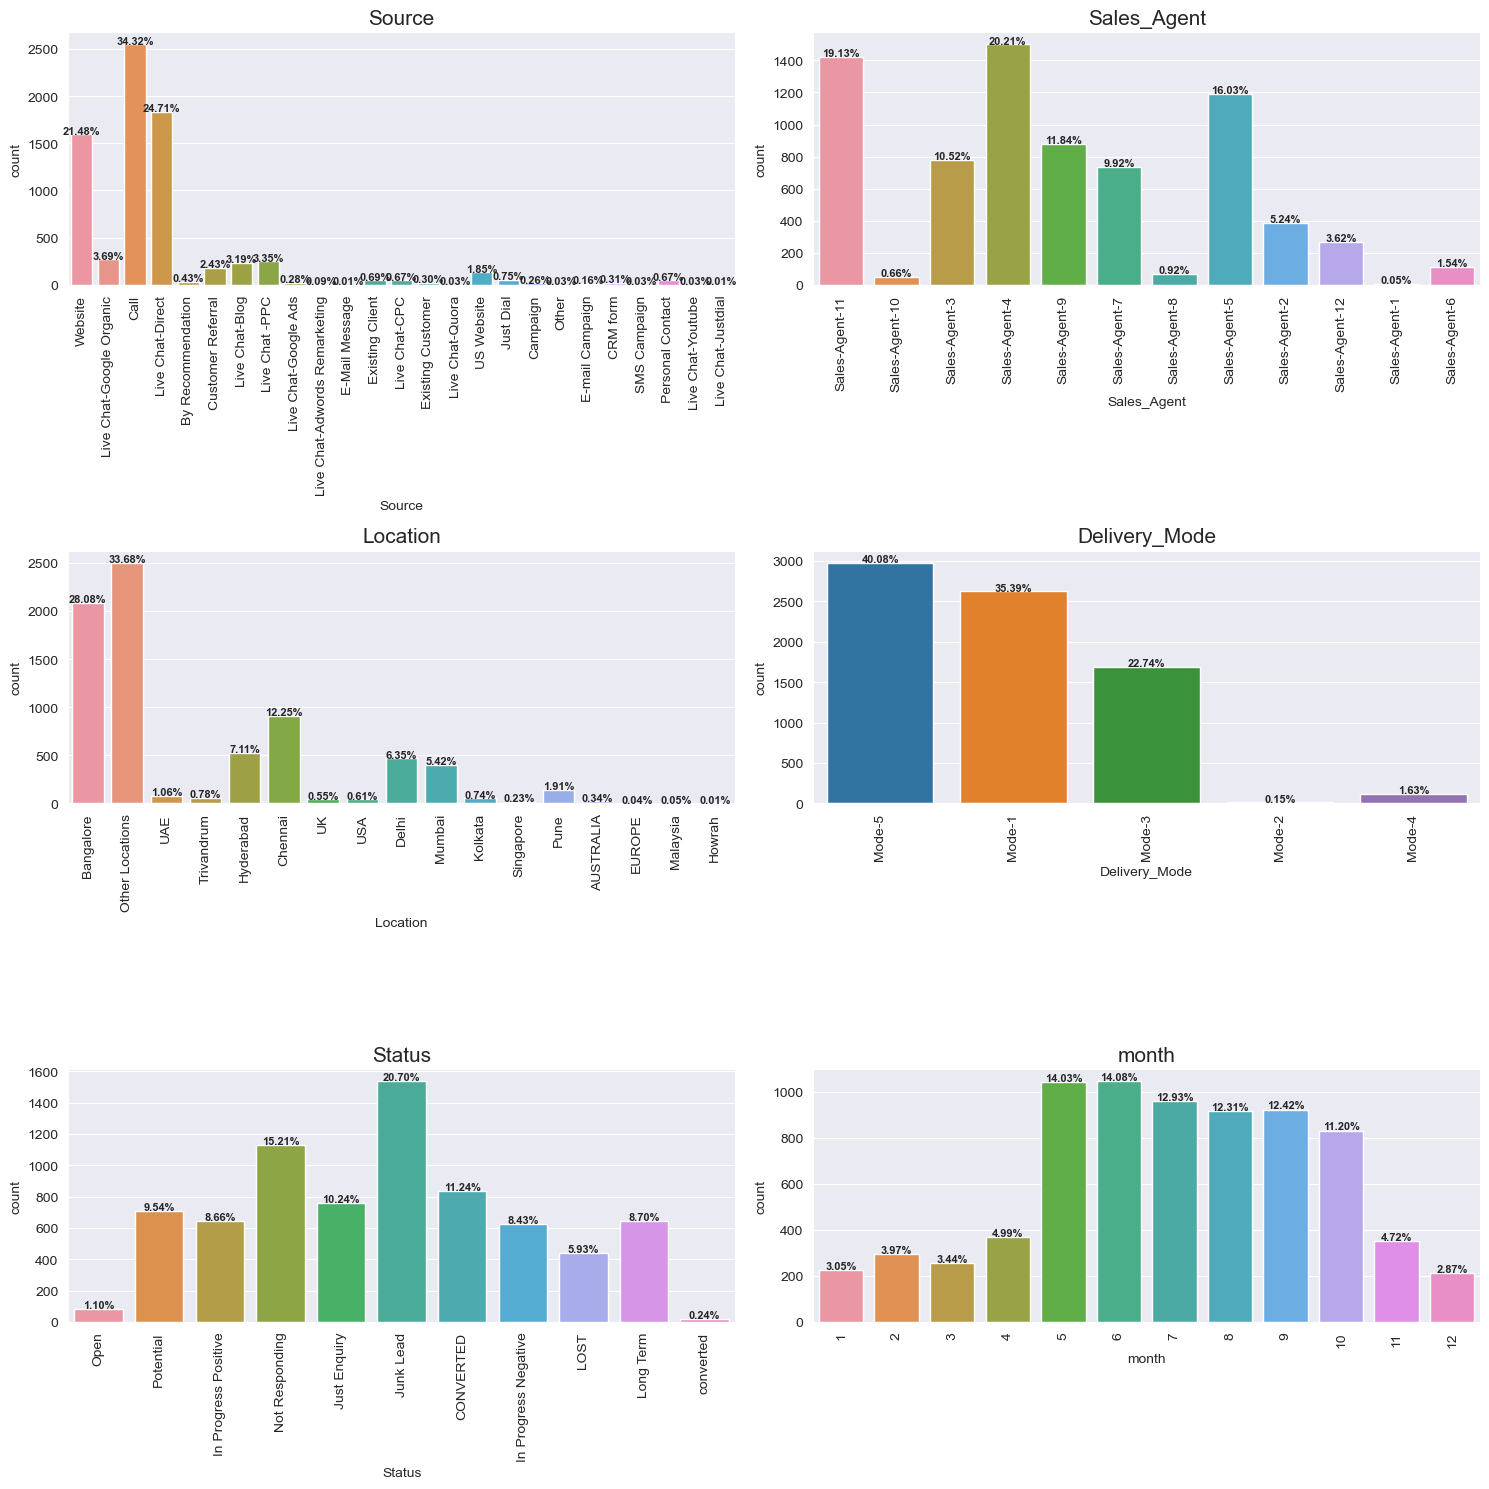

In [37]:
plt.figure(figsize= (15, 15), facecolor= 'white')
sns.set_style('darkgrid')
plotnumber=1

for column in categorical_features:
  if plotnumber <=6:
    ax= plt.subplot(3,2, plotnumber)
    sns.countplot(data= data, x= column)\
    .set_title(f'{column}', fontsize= 15)
    plt.xticks(rotation= 90)

    
    # Displaying bar values in percentage rounded off to two decimal digits with '%' sign
    # calculates the total no of datapoints for % 
    total = float(len(data))

    # iterates through each patch (bar)
    for p in ax.patches:
            # get_height()--> height of the current bar
            height = p.get_height()
            # positions the text at the center of each bar 
            ax.text(p.get_x() + p.get_width() / 2., height + 5,
                    f'{height / total * 100:.2f}%', ha="center", fontsize=8, fontweight= 'bold')
        
  plotnumber +=1
plt.tight_layout()
plt.show()

#### Insights:
- **Source**:
  - Around 34 % Leads were generated from Call Source followed by around 25% of leads from live chat-direct.
  - Around 21 % Leads were generated from their Website .
  - Hence **Call source has the maximum frequency** and the combination of **three sources(i.e., call source, live chat-direct and website)** constitute around  **80% of sources**.
  - The rest are generated by other sources

- **Sales Agent**
  - Agent 4, Agent 11, Agent 5 together generated around 56% of leads.
  - Agent-3 , Agent-4 , Agent-5 , Agent-7 , Agent-9 and Agent-11 together generated More than 87 %Leads. 
  - **Sales agent 4 has generated the highest no of leads**.

- **Location**
  - 33 % Leads were generated from Other Locations.
  - From **Bangalore 28% and Chennai 12%  Leads** were Generated.
  - From Hyderabad 7% , Delhi 6% and Mumbai 5%  Leads were Generated.
  - The rest of the locations have very small no of leads.

- **Delivery mode**:
  - Most of the leads preferred Mode-5 , Mode-1 ,Mode-3 type of deliveries.

- **Status**:
  - 20 % Leads that are generated were Junk Leads.
  - 15 % Leads were Not Responding.
  - 11 % Leads got Converted(Success).
  - 10 % Leads are just Enquired.

- **leads generated month-wise**:
  -  76% leads were generated between **May to October** month.

#### BIVARIATE ANALYSIS:

In [40]:
# lead Status column need to be pre-processed to get a target variable

In [5]:
data['Status'].unique()

array(['Open', 'Potential', 'In Progress Positive', 'Not Responding',
       'Just Enquiry', 'Junk Lead', 'CONVERTED', 'In Progress Negative',
       'LOST', 'Long Term', 'converted'], dtype=object)

- There is no explicit target variable given.
- Hence the lead "status" column should be analysed and the categories in that column need to be segregated into two broad types such as:

  - **High Potential -  CONVERTED, Potential, In Progress Positive, converted**
  - **Low Potential - Junk Lead, Not Responding, Just Enquiry, Long Term, In Progress Negative, LOST and Open**

In [6]:
# High Potential Leads
high_potential_statuses = ["CONVERTED", "Potential", "In Progress Positive", "converted"]
for status in high_potential_statuses:
    data.loc[data['Status'] == status, 'Status'] = "High Potential"

# Low Potential Leads
low_potential_statuses = ["Junk Lead", "Not Responding", "Just Enquiry", "Long Term", "In Progress Negative", "LOST", "Open"]
for status in low_potential_statuses:
    data.loc[data['Status'] == status, 'Status'] = "Low Potential"

In [7]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,created,year,month,day,hour,minutes
7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,Low Potential,2018-04-28 09:45:00,2018,4,28,9,45
7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,Low Potential,2018-04-28 09:43:00,2018,4,28,9,43
7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Low Potential,2018-04-28 09:20:00,2018,4,28,9,20
7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Low Potential,2018-04-28 08:04:00,2018,4,28,8,4
7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,High Potential,2018-04-28 07:54:00,2018,4,28,7,54


In [18]:
# fetching the unique values to assess the columns required for bivariate analysis
data.nunique()

Created          6752
Product_ID         29
Source             25
Mobile            486
EMAIL             883
Sales_Agent        12
Location           17
Delivery_Mode       5
Status              2
created          6752
year                1
month              12
day                26
hour               24
minutes            60
dtype: int64

#### Source Vs Status

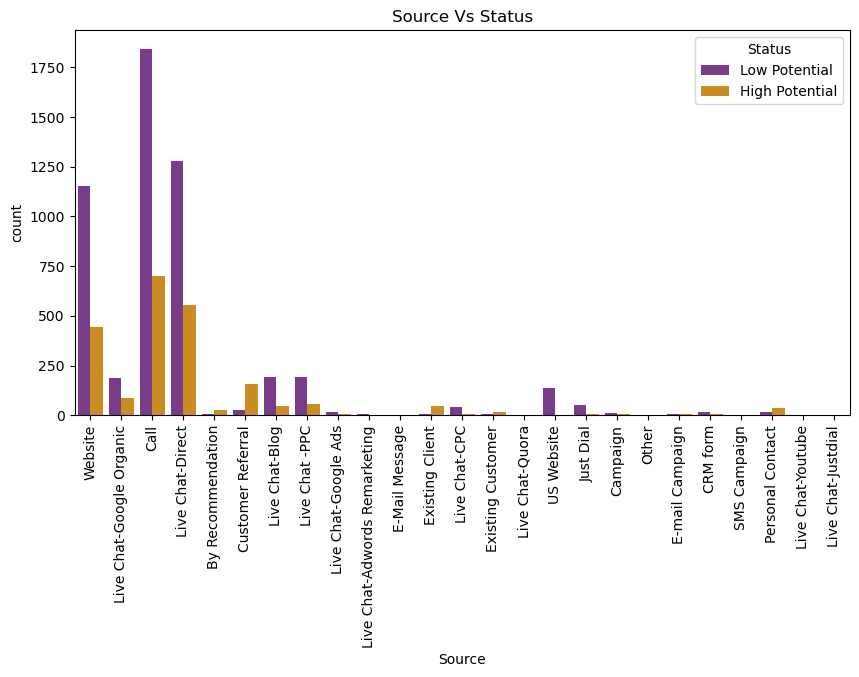

In [21]:
plt.figure(figsize= (10, 5))
sns.countplot(data= data, x= 'Source', hue= 'Status', palette='CMRmap')
plt.title('Source Vs Status')
plt.xticks(rotation= 90)
plt.show()

#### Insights:-

- Leads Generated by the following sources have high potential:
  - by Recommendation 
  - Customer Referral 
  - Existing Client 
  - Existing Customer
  - Personal Contact
                                      
- Leads Generated By the following have approximately 50% Chance for High Potential:
  - Live Chat Direct
  - Website
  - Live Chat Google Organic
  - Call
  - Live Chat Blog
  - Live Chat PPC

#### Sales Agent Vs Status

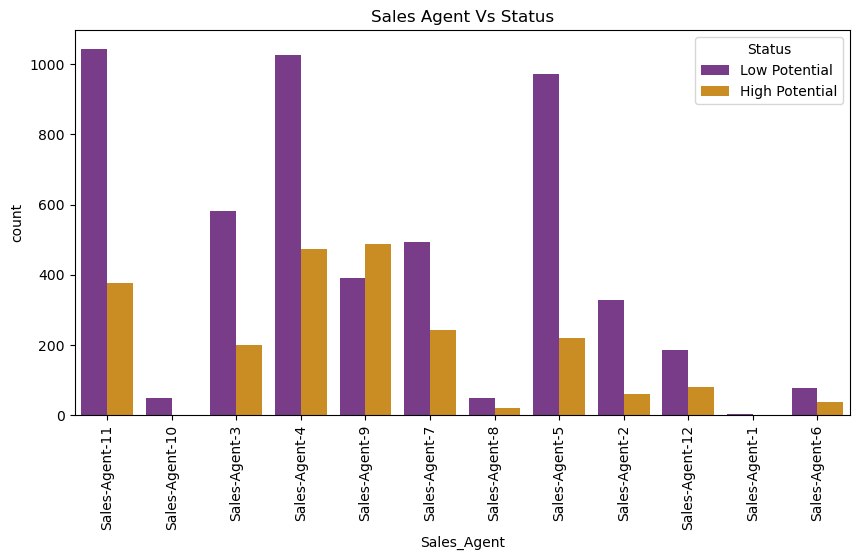

In [22]:
plt.figure(figsize= (10, 5))
sns.countplot(data= data, x= 'Sales_Agent', hue= 'Status', palette='CMRmap')
plt.title('Sales Agent Vs Status')
plt.xticks(rotation= 90)
plt.show()

#### Insights:-
- Leads generated by Sales-Agent-9 have High potential.
- Leads generated by Sales-Agent-10 and Sales-Agent-1 have Low Potential.
- Leads generated by other Agents have more than 40 % High Potential .

#### Location Vs Status

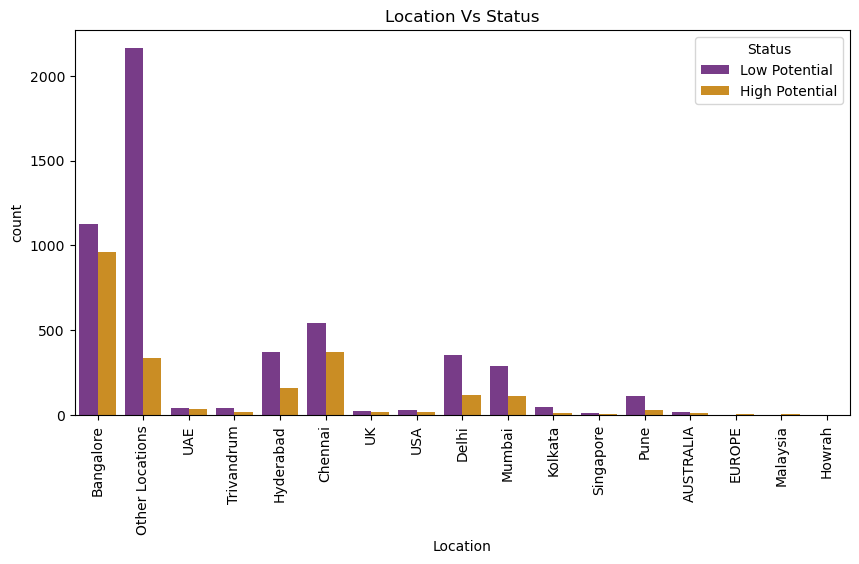

In [10]:
plt.figure(figsize= (10, 5))
sns.countplot(data= data, x= 'Location', hue= 'Status', palette='CMRmap')
plt.title('Location Vs Status')
plt.xticks(rotation= 90)
plt.show()

#### Insights:-
-  Leads Generated in Bangalore , UAE , UK , USA and AUSTRALIA having High Potential.
- only 40% Leads have High potential form locations such as Mumbai , Delhi , Hyderabad , Chennai and the remaining 60% have Low potential.

#### Delivery_Mode Vs Status

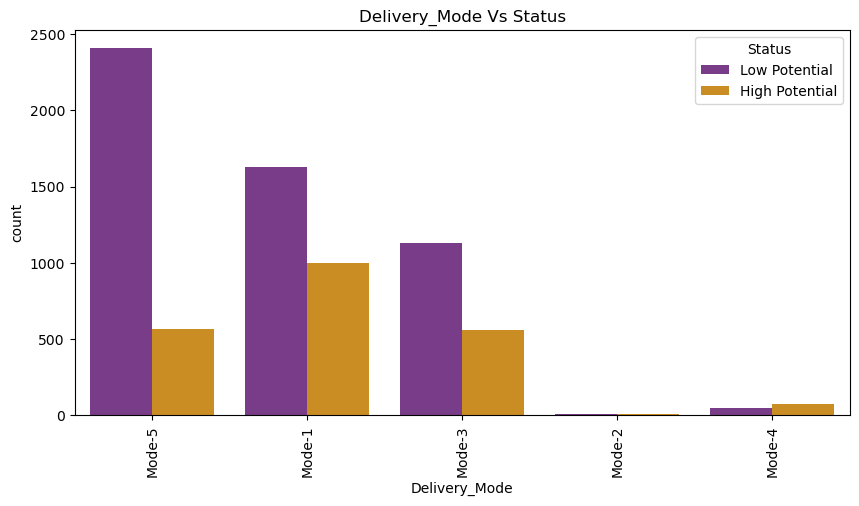

In [11]:
plt.figure(figsize= (10, 5))
sns.countplot(data= data, x= 'Delivery_Mode', hue= 'Status', palette='CMRmap')
plt.title('Delivery_Mode Vs Status')
plt.xticks(rotation= 90)
plt.show()

#### Insights:-
- Leads who choose delivery MODE-5 have low chance of having High potential as compared to other modes.
- High potential leads choose MODE-4 as delivery mode

#### Month Vs Status

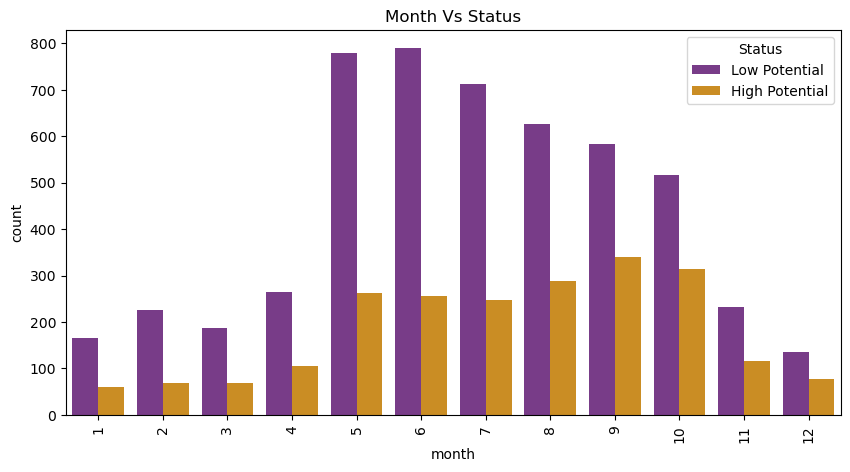

In [12]:
plt.figure(figsize= (10, 5))
sns.countplot(data= data, x= 'month', hue= 'Status', palette='CMRmap')
plt.title('Month Vs Status')
plt.xticks(rotation= 90)
plt.show()

### Insights:-
- we can see more leads generated during the months between may and october compared to other months.
- Nonetheless, the prospect of becoming high potential or low potential is not that much influenced by the month factor here.
- There is 50% probability of becoming high or low potential during almost all the months.

#### **DATA PREPROCESSING**

#### DROPPING UNNECESSARY COLUMNS


In [123]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,created,year,month,day,hour,minutes
0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Low Potential,2018-11-14 10:05:00,2018,11,14,10,5
1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Low Potential,2018-11-14 09:22:00,2018,11,14,9,22
2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Low Potential,2018-11-14 09:21:00,2018,11,14,9,21
3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Low Potential,2018-11-14 08:46:00,2018,11,14,8,46
4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Low Potential,2018-11-14 07:34:00,2018,11,14,7,34


In [8]:
data.drop(['Created', 'Mobile', 'EMAIL'], axis= 1, inplace= True)

In [9]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,created,year,month,day,hour,minutes
0,NaN,Website,Sales-Agent-11,NaN,Mode-5,Low Potential,2018-11-14 10:05:00,2018,11,14,10,5
1,NaN,Website,Sales-Agent-10,NaN,Mode-5,Low Potential,2018-11-14 09:22:00,2018,11,14,9,22
2,NaN,Website,Sales-Agent-10,NaN,Mode-5,Low Potential,2018-11-14 09:21:00,2018,11,14,9,21
3,NaN,Website,Sales-Agent-10,NaN,Mode-5,Low Potential,2018-11-14 08:46:00,2018,11,14,8,46
4,NaN,Website,Sales-Agent-10,NaN,Mode-5,Low Potential,2018-11-14 07:34:00,2018,11,14,7,34


#### HANDLING NULL AND CORRUPT VALUES

In [10]:
data.isnull().sum()

Product_ID       58
Source           17
Sales_Agent      23
Location         58
Delivery_Mode     0
Status            0
created           0
year              0
month             0
day               0
hour              0
minutes           0
dtype: int64

Checking if there are any empty values in any of the columns other than null values

In [11]:
for column in data.columns:
    if data[column].eq('').any():
        print(column)

Insights:
- we have null values in columns: Product_ID, Source, Sales_Agent, Location
- There are no empty spaces in any of the value cell of the columns

Handling null values

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   Product_ID     7364 non-null   float64      
 1   Source         7405 non-null   object       
 2   Sales_Agent    7399 non-null   object       
 3   Location       7364 non-null   object       
 4   Delivery_Mode  7422 non-null   object       
 5   Status         7422 non-null   object       
 6   created        7422 non-null   datetime64[s]
 7   year           7422 non-null   int32        
 8   month          7422 non-null   int32        
 9   day            7422 non-null   int32        
 10  hour           7422 non-null   int32        
 11  minutes        7422 non-null   int32        
dtypes: datetime64[s](1), float64(1), int32(5), object(5)
memory usage: 551.0+ KB


In [13]:
# Product_ID is in float type--> hence median can be used to impute the null values
# Source, Sales_Agent and Location are the categorical features hence mode can be used to handle the null values. 

In [14]:
# handling null values

data.loc[data['Source'].isnull()== True, 'Source'] = data['Source'].mode()[0]
data.loc[data['Sales_Agent'].isnull()== True, 'Sales_Agent'] = data['Sales_Agent'].mode()[0]
data.loc[data['Location'].isnull()== True, 'Location'] = data['Location'].mode()[0]

In [15]:
data.loc[data['Product_ID'].isnull()== True, 'Product_ID'] = data['Product_ID'].median()

In [16]:
# checking the columns after handling null values
data.isnull().sum()

Product_ID       0
Source           0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
created          0
year             0
month            0
day              0
hour             0
minutes          0
dtype: int64

#### CHECKING THE DUPLICATE RECORDS

In [17]:
data.duplicated().sum()

27

In [18]:
data.drop_duplicates(keep= 'first', inplace=True) # keeping the first occurence of the record and removing the other duplicates

In [19]:
data.duplicated().sum()

0

#### ENCODING

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7395 entries, 0 to 7421
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype        
---  ------         --------------  -----        
 0   Product_ID     7395 non-null   float64      
 1   Source         7395 non-null   object       
 2   Sales_Agent    7395 non-null   object       
 3   Location       7395 non-null   object       
 4   Delivery_Mode  7395 non-null   object       
 5   Status         7395 non-null   object       
 6   created        7395 non-null   datetime64[s]
 7   year           7395 non-null   int32        
 8   month          7395 non-null   int32        
 9   day            7395 non-null   int32        
 10  hour           7395 non-null   int32        
 11  minutes        7395 non-null   int32        
dtypes: datetime64[s](1), float64(1), int32(5), object(5)
memory usage: 606.6+ KB


In [21]:
# columns need to encoded: 
# Product_ID, Source, Sales_Agent, Location, Delivery_Mode, Status

#### **Product_ID**

In [22]:
data['Product_ID'].value_counts()

Product_ID
18.0    1767
15.0    1494
19.0    1189
9.0      992
27.0     739
5.0      486
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: count, dtype: int64

In [23]:
# some of the categories (IDs) have less than 10 values. hence they can be combined into a single category for encoding.

In [24]:
# Replacing the IDs which have less than 10 leads into product_id "0"

data['Product_ID'].replace({22.0: 0.0, 3.0: 0.0, 17.0: 0.0, 6.0: 0.0, 8.0: 0.0,
                            13.0: 0.0, 24.0: 0.0, 16.0: 0.0, 23.0 : 0.0, 28.0: 0.0,
                            7.0: 0.0, 4.0: 0.0}, inplace= True)

In [25]:
# label encoding
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
data['Product_ID']= lb.fit_transform (data['Product_ID'])

In [26]:
data['Product_ID'].value_counts()

Product_ID
10    1767
9     1494
11    1189
4      992
16     739
3      486
5      168
1      105
12     102
14      90
13      66
0       53
2       38
7       36
15      31
8       27
6       12
Name: count, dtype: int64

#### **Source**

In [27]:
data['Source'].value_counts()

Source
Call                             2540
Live Chat-Direct                 1834
Website                          1592
Live Chat-Google Organic          274
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 179
US Website                        137
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      50
By Recommendation                  32
CRM form                           23
Existing Customer                  22
Live Chat-Google Ads               21
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: count, dtype: int64

In [28]:
# Combining the rare categories into a single category for encoding.(categories with less than 10 values)

In [29]:
data['Source'].replace({"Live Chat-Adwords Remarketing": "others", "Live Chat-Quora": "others", "Other": "others",
                        "SMS Campaign": "others", "Live Chat-Youtube": "others", "E-Mail Message": "others",
                        "Live Chat-Justdial": "others"}, inplace= True)

In [30]:
data['Source'].value_counts()

Source
Call                        2540
Live Chat-Direct            1834
Website                     1592
Live Chat-Google Organic     274
Live Chat -PPC               249
Live Chat-Blog               237
Customer Referral            179
US Website                   137
Just Dial                     56
Existing Client               51
Live Chat-CPC                 50
Personal Contact              50
By Recommendation             32
CRM form                      23
Existing Customer             22
Live Chat-Google Ads          21
Campaign                      19
others                        17
E-mail Campaign               12
Name: count, dtype: int64

In [31]:
# manually changing all categorical data to numerical data (there are many categories hence one- hot encoding may increase the dimensions)
data['Source'].replace({"Call":18, "Live Chat-Direct":17, "Website":16, "Live Chat-Google Organic":15, "Live Chat -PPC":14,
                        "Live Chat-Blog":13, "Customer Referral":12, "US Website":11, "Just Dial":10, "Existing Client":9, 
                        "Live Chat-CPC":8, "Personal Contact":7,"By Recommendation":6,"CRM form":5,"Existing Customer":4,
                        "Live Chat-Google Ads":3, "Campaign":2,"others":1, "E-mail Campaign":0},inplace=True)

In [32]:
data['Source'].value_counts()

Source
18    2540
17    1834
16    1592
15     274
14     249
13     237
12     179
11     137
10      56
9       51
8       50
7       50
6       32
5       23
4       22
3       21
2       19
1       17
0       12
Name: count, dtype: int64

#### **Sales_Agent**

In [33]:
data['Sales_Agent'].value_counts()

Sales_Agent
Sales-Agent-4     1516
Sales-Agent-11    1417
Sales-Agent-5     1183
Sales-Agent-9      875
Sales-Agent-3      777
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      47
Sales-Agent-1        4
Name: count, dtype: int64

In [34]:
# Manual encoding
data['Sales_Agent'].replace({"Sales-Agent-4":11, "Sales-Agent-11":10, "Sales-Agent-5":9, "Sales-Agent-9":8, "Sales-Agent-3":7,
                             "Sales-Agent-7":6, "Sales-Agent-2":5, "Sales-Agent-12":4, "Sales-Agent-6":3, "Sales-Agent-8":2, 
                             "Sales-Agent-10":1, "Sales-Agent-1":0},inplace=True)

In [35]:
data['Sales_Agent'].value_counts()

Sales_Agent
11    1516
10    1417
9     1183
8      875
7      777
6      736
5      389
4      269
3      114
2       68
1       47
0        4
Name: count, dtype: int64

#### **Location**

In [36]:
data['Location'].value_counts()

Location
Other Locations    2532
Bangalore          2083
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: count, dtype: int64

In [37]:
# combining rare categories into a single category (can be added to the already existing column "Other Locations")
data['Location'].replace({"Malaysia": "Other Locations", "EUROPE": "Other Locations", "Howrah": "Other Locations"}, inplace= True)

In [38]:
# Manual encoding
data['Location'].replace({"Other Locations":13, "Bangalore":12, "Chennai":11, "Hyderabad":10, "Delhi":9, 
                          "Mumbai":8, "Pune":7, "UAE":6, "Trivandrum":5, "Kolkata":4, 
                          "USA":3, "UK":2, "AUSTRALIA":1, "Singapore":0},inplace=True)

In [39]:
data['Location'].value_counts()

Location
13    2540
12    2083
11     909
10     528
9      471
8      402
7      142
6       79
5       58
4       55
3       45
2       41
1       25
0       17
Name: count, dtype: int64

#### **Delivery_Mode**

In [40]:
data['Delivery_Mode'].value_counts()

Delivery_Mode
Mode-5    2948
Mode-1    2627
Mode-3    1688
Mode-4     121
Mode-2      11
Name: count, dtype: int64

In [41]:
# Manually encoding
data['Delivery_Mode'].replace({"Mode-5":4, "Mode-1":3, "Mode-3":2, "Mode-4":1, "Mode-2":0},inplace=True)

In [42]:
data['Delivery_Mode'].value_counts()

Delivery_Mode
4    2948
3    2627
2    1688
1     121
0      11
Name: count, dtype: int64

#### **Status**

In [43]:
data['Status'].value_counts()

Status
Low Potential     5193
High Potential    2202
Name: count, dtype: int64

In [44]:
# manual encoding
data['Status'].replace({"Low Potential": 0, "High Potential": 1}, inplace= True)

In [45]:
data['Status'].value_counts()

Status
0    5193
1    2202
Name: count, dtype: int64

In [46]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,created,year,month,day,hour,minutes
0,10,16,10,13,4,0,2018-11-14 10:05:00,2018,11,14,10,5
1,10,16,1,13,4,0,2018-11-14 09:22:00,2018,11,14,9,22
2,10,16,1,13,4,0,2018-11-14 09:21:00,2018,11,14,9,21
3,10,16,1,13,4,0,2018-11-14 08:46:00,2018,11,14,8,46
4,10,16,1,13,4,0,2018-11-14 07:34:00,2018,11,14,7,34


In [47]:
data.nunique()

Product_ID         17
Source             19
Sales_Agent        12
Location           14
Delivery_Mode       5
Status              2
created          6752
year                1
month              12
day                26
hour               24
minutes            60
dtype: int64

#### HANDLING OUTLIERS

Insights:
- Since all the relevant columns are categorical/ discrete in nature, there is no need to handle outliers.

#### **FEATURE ENGINEERING**

In [48]:
data.nunique()

Product_ID         17
Source             19
Sales_Agent        12
Location           14
Delivery_Mode       5
Status              2
created          6752
year                1
month              12
day                26
hour               24
minutes            60
dtype: int64

In [49]:
# dropping the irrelevant columns:
# 'year' column has only one value hence removed
# day, hour, minutes do not have any significant relationship with the target variable
data.drop(['created', 'year', 'day', 'hour', 'minutes'], axis=1, inplace=True)

In [50]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,month
0,10,16,10,13,4,0,11
1,10,16,1,13,4,0,11
2,10,16,1,13,4,0,11
3,10,16,1,13,4,0,11
4,10,16,1,13,4,0,11


<Axes: >

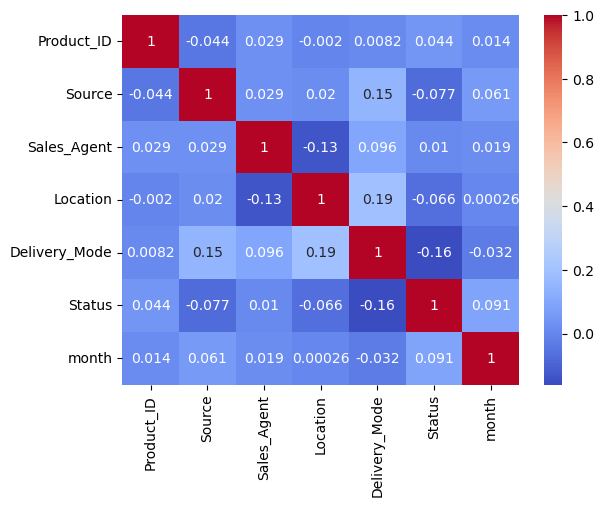

In [51]:
# CORRELATION COEFFICIENT
sns.heatmap(data.corr(), annot=True, cmap= 'coolwarm')

Insights:
- No more column can be removed eventhough they have less correlation with the target since these columns provide fundamental information about the target.


#### **SCALING THE DATA**

In [52]:
# Splitting the data into X and y
X= data.drop('Status', axis= 1)
y= data['Status']

In [53]:
# splitting the data into training set and the testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)


In [54]:
# checking the shape
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (5916, 6)
X_test: (1479, 6)
y_train: (5916,)
y_test: (1479,)


### Insights:
Scaling is usually done on continuous columns but in certain cases to categorical columns also
- **In categorical columns,** 
  - --> If the data is label encoded/ have some inherent order/ encoded numerically.
- **However scaling is not needed when**,
  - 1. Binary features: Since the values are already within the standardized range( 0 and 1)
  - 2. One-Hot encoded features: Each category is represented as a separate binary column, dont require further scaling

In [55]:
# applying standard scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [56]:
# Fitting the scaler on train data and transform it
X_train_scaled= scaler.fit_transform(X_train)

# Transforming the test data using the same scaler
X_test_scaled= scaler.transform(X_test)

In [57]:
# converting the scaled data into dataframe for better readability
X_train_scaled= pd.DataFrame(X_train_scaled, columns= X.columns)
X_test_scaled= pd.DataFrame(X_test_scaled, columns= X.columns)

In [58]:
X_train_scaled

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,month
0,0.257463,0.328980,0.709685,-0.536693,1.051338,-1.881768
1,1.847390,0.691950,1.145258,-0.093370,-1.354276,-0.362590
2,-1.332464,-0.033990,0.274111,-1.866659,-0.151469,-0.742384
3,-0.007525,0.691950,0.274111,0.793274,1.051338,-1.881768
4,0.257463,-0.396960,-1.032610,0.349952,-0.151469,0.397000
...,...,...,...,...,...,...
5911,-0.007525,0.691950,-0.161463,0.349952,1.051338,1.156589
5912,0.257463,-1.122901,-2.339331,0.349952,-0.151469,-0.362590
5913,-1.332464,-1.122901,0.709685,-4.969915,-1.354276,-0.362590
5914,0.257463,0.328980,1.145258,-0.093370,1.051338,0.017205


#### **BALANCING THE DATA**

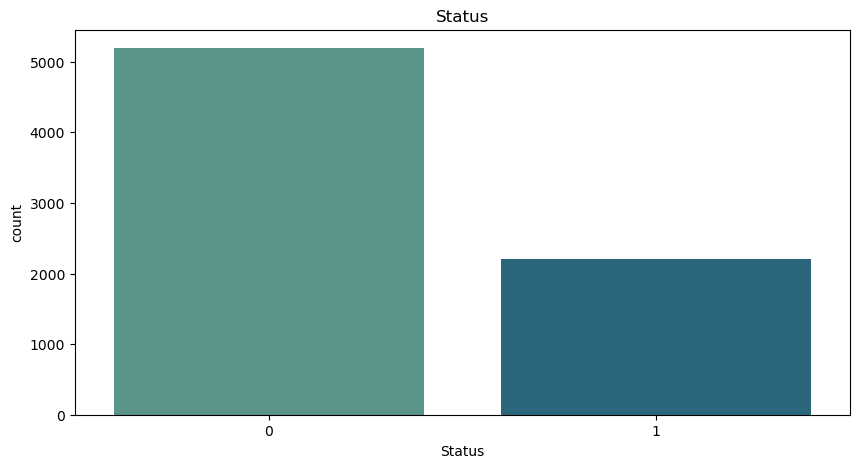

In [59]:
plt.figure(figsize= (10, 5))
sns.countplot(data= data, x= 'Status', palette= 'crest')
plt.title("Status")
plt.show()

In [60]:
y_train.value_counts()

Status
0    4154
1    1762
Name: count, dtype: int64

In [61]:
# the data is imbalanced, hence oversampling is done.

In [62]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(random_state=42)
X_train_scaled_sm, y_train_sm= smote.fit_resample(X_train_scaled, y_train)

In [63]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_train_sm))

Counter({0: 4154, 1: 1762})
Counter({0: 4154, 1: 4154})


#### **MODEL BUILDING**

#### LOGISTIC REGRESSION

In [64]:
# importing the library
from sklearn.linear_model import LogisticRegression

# Initializing the model
log_reg= LogisticRegression()

# fitting the model
log_reg.fit(X_train_scaled_sm, y_train_sm)

LogisticRegression()

In [65]:
# prediction
y_pred_lg= log_reg.predict(X_test_scaled)
y_pred_lg

array([1, 0, 1, ..., 1, 0, 1], dtype=int64)

In [66]:
# Model evaluation

# importing the metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [67]:
# accuracy score
a= accuracy_score(y_test, y_pred_lg)
print(f' Model accuracy score is {a}')

 Model accuracy score is 0.6193373901284652


In [68]:
print(f'Precision score: {precision_score(y_test, y_pred_lg, average= "macro")}\
        \nRecall score: {recall_score(y_test, y_pred_lg, average= "macro")}\
        \nf1 score: {f1_score(y_test, y_pred_lg, average= "macro")}')

Precision score: 0.5848497239828256        
Recall score: 0.5980400734972438        
f1 score: 0.5831080759708513


In [69]:
# Checking for overfitting and underfitting

Training_accuracy= log_reg.score(X_train_scaled_sm, y_train_sm)
Testing_accuracy= log_reg.score(X_test_scaled, y_test)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')


Training set score: 0.6003851709195955
Testing set score: 0.6193373901284652


The training set accuracy is **0.60** and the testing score is **0.61** which are quite close to each other.

In [70]:
# cross validation score
from sklearn.model_selection import cross_val_score
score= cross_val_score(log_reg, X, y, cv= 10, scoring= 'accuracy')
print(f'Cross validation accuracy scores: {score}')

Cross validation accuracy scores: [0.69594595 0.70540541 0.69189189 0.70135135 0.70540541 0.68876861
 0.70771313 0.68470907 0.71583221 0.70230041]


In [71]:
log_acc= pd.DataFrame({'CV mean': score.mean(), 'Std': score.std()}, index= ['Cross validation accuracy'])
log_acc

,CV mean,Std
Cross validation accuracy,0.699932,0.009043


- The **mean cross validation** of the model is 0.69 which shows that the model is expected to be around **69%** accurate on average.
- **10 fold cross validation** accuracy shows some improvement in the model's performance.

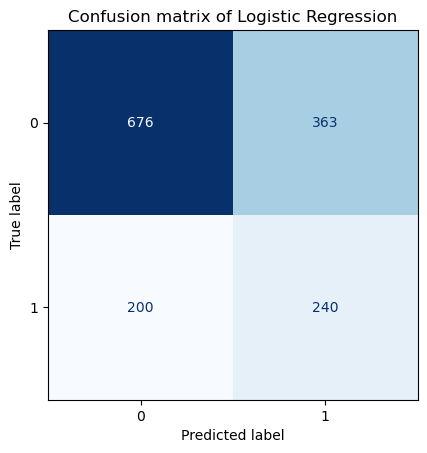

In [94]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test, colorbar= False, cmap= 'Blues')
plt.title('Confusion matrix of Logistic Regression')
plt.grid(False)

In [79]:
# classification report

print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71      1039
           1       0.40      0.55      0.46       440

    accuracy                           0.62      1479
   macro avg       0.58      0.60      0.58      1479
weighted avg       0.66      0.62      0.63      1479



In [80]:
# Performance metrics

'''Defining a function to calculate all the required performance metrics
for the given model'''
def metrics_calculator(y_test, y_pred, model_name):


  result= pd.DataFrame(data= [accuracy_score(y_test, y_pred),
                              precision_score(y_test, y_pred, average= 'macro'),
                              recall_score(y_test, y_pred, average= 'macro'),
                              f1_score(y_test, y_pred, average= 'macro')],
                       index=['Accuracy','precision','Recall', 'F1-score'],
                       columns= [model_name])
  return result


In [81]:
log_reg_result= metrics_calculator(y_test, y_pred_lg, 'Logistic Regression')
log_reg_result

,Logistic Regression
Accuracy,0.619337
precision,0.584850
Recall,0.598040
F1-score,0.583108


In [88]:
# saving it in a different dataframe for model conclusion report

log_reg_result1= pd.DataFrame(data= [0.619337, 0.584850, 0.598040, 0.583108], 
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Logistic Regression'])
log_reg_result1.style.background_gradient(cmap= 'Blues')

,Logistic Regression
Accuracy,0.619337
precision,0.584850
Recall,0.598040
F1-score,0.583108


#### HYPERPARAMETER TUNING OF LOGISTIC REGRESSION

In [95]:
# importing the required libraries
from sklearn.model_selection import GridSearchCV

# initializing the model
log_reg= LogisticRegression()

# defining the parameter grid
param_grid= {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             'max_iter': [50, 100, 200],
             'l1_ratio': [0.1, 0.5, 0.7, 1]}

# using grid search cv for searching best hyperparameters
grid_search= GridSearchCV(log_reg, param_grid=param_grid, cv= 5, scoring= 'accuracy')

# fitting the model
grid_search.fit(X_train_scaled_sm, y_train_sm)

# Setting the model to the best combination of parameters
tuned_log_model_cv= grid_search.best_estimator_

# Summarizing the result
print('Best Score: ', grid_search.best_score_)
print('Best hyperparameters: ', grid_search.best_params_)

Best Score:  0.5997825096302157
Best hyperparameters:  {'C': 1, 'l1_ratio': 0.1, 'max_iter': 50, 'penalty': 'l2'}


In [96]:
# Training the tuned model

tuned_log_model_cv.fit(X_train_scaled_sm, y_train_sm)

LogisticRegression(C=1, l1_ratio=0.1, max_iter=50)

In [97]:
# prediction
y_pred= tuned_log_model_cv.predict(X_test_scaled)

In [98]:
# Accuracy score

print(f'Tuned Logistic Regression model accuracy score:\n {accuracy_score(y_test, y_pred)}')

Tuned Logistic Regression model accuracy score:
 0.6193373901284652


In [99]:
# Checking for overfitting and underfitting

Training_accuracy= tuned_log_model_cv.score(X_train_scaled_sm, y_train_sm)
Testing_accuracy= tuned_log_model_cv.score(X_test_scaled, y_test)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

Training set score: 0.6003851709195955
Testing set score: 0.6193373901284652


In [100]:
# tuned model classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.65      0.71      1039
           1       0.40      0.55      0.46       440

    accuracy                           0.62      1479
   macro avg       0.58      0.60      0.58      1479
weighted avg       0.66      0.62      0.63      1479



In [101]:
# tuned model performance metrics

tuned_log_result= metrics_calculator(y_test, y_pred, 'Tuned Logistic Regression')
tuned_log_result

,Tuned Logistic Regression
Accuracy,0.619337
precision,0.584850
Recall,0.598040
F1-score,0.583108


In [102]:
# saving it in a different dataframe for model conclusion report
tuned_log_result1= pd.DataFrame(data= [0.619337, 0.584850, 0.598040, 0.583108],                            
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Tuned Logistic Regression'])
tuned_log_result1.style.background_gradient(cmap= 'Blues')

,Tuned Logistic Regression
Accuracy,0.619337
precision,0.584850
Recall,0.598040
F1-score,0.583108


#### SUPPORT VECTOR MACHINE

In [103]:
from sklearn.svm import SVC                       # importing svm
svm = SVC(random_state=1)                         # initializing the model
svm.fit(X_train_scaled_sm,y_train_sm)             # training SVC model with data

SVC(random_state=1)

In [105]:
# prediction
y_pred = svm.predict(X_test_scaled)           
y_pred        

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [106]:
# evaluation
a = accuracy_score(y_test,y_pred)
print(f'Accuracy of Support Vector classifier: {a}')

Accuracy of Support Vector classifier: 0.6443542934415145


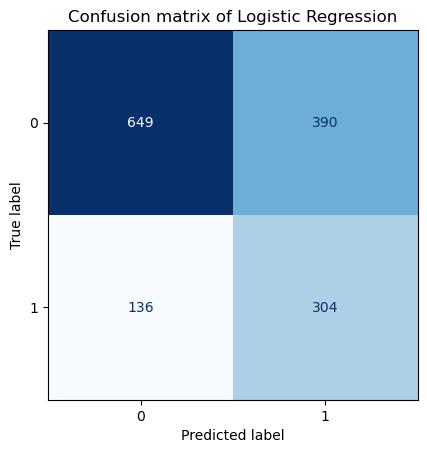

In [107]:
# Confusion matrix

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(svm, X_test_scaled, y_test, colorbar= False, cmap= 'Blues')
plt.title('Confusion matrix of Logistic Regression')
plt.grid(False)

In [108]:
# classification report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.62      0.71      1039
           1       0.44      0.69      0.54       440

    accuracy                           0.64      1479
   macro avg       0.63      0.66      0.62      1479
weighted avg       0.71      0.64      0.66      1479



In [109]:
# cross validation score
from sklearn.model_selection import cross_val_score
score= cross_val_score(svm, X, y, cv= 10, scoring= 'accuracy')
print(f'Cross validation accuracy scores: {score}')

Cross validation accuracy scores: [0.70135135 0.70675676 0.70540541 0.7        0.70405405 0.70771313
 0.70365359 0.69688769 0.70500677 0.69418133]


In [110]:
svm_acc= pd.DataFrame({'CV mean': score.mean(), 'Std': score.std()}, index= ['Cross validation accuracy'])
svm_acc

,CV mean,Std
Cross validation accuracy,0.702501,0.004148


- The **mean cross validation** of the model is 0.70 which shows that the model is expected to be around **70%** accurate on average.
- **10 fold cross validation** accuracy shows some improvement in the model's performance.

In [111]:
# Checking for overfitting and underfitting

Training_accuracy= svm.score(X_train_scaled_sm, y_train_sm)
Testing_accuracy= svm.score(X_test_scaled, y_test)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')


Training set score: 0.7060664419836302
Testing set score: 0.6443542934415145


The training set accuracy is **0.70** and the testing score is **0.64** which shows that the model is overfitted.

In [112]:
svm_result= metrics_calculator(y_test, y_pred, 'SVM')
svm_result

,SVM
Accuracy,0.644354
precision,0.632396
Recall,0.657774
F1-score,0.623889


In [115]:
# saving it in a different dataframe for model conclusion report

svm_result1= pd.DataFrame(data= [0.644354, 0.632396, 0.657774, 0.623889], 
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['SVM'])
svm_result1.style.background_gradient(cmap= 'Blues')

,SVM
Accuracy,0.644354
precision,0.632396
Recall,0.657774
F1-score,0.623889


#### HYPERPARAMETER TUNING OF SVM

In [116]:
# initializing the model
svm= SVC()

# defining the parameter grid
param_grid= {
             'C': [0.1, 1, 10, 100],
             'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel': ['rbf', 'linear']}

# using grid search cv for searching best hyperparameters
grid_search= GridSearchCV(svm, param_grid=param_grid, cv= 5, scoring= 'accuracy', verbose= 1, n_jobs= -1)

# fitting the model
grid_search.fit(X_train_scaled_sm, y_train_sm)

# Setting the model to the best combination of parameters
tuned_svm_model_cv= grid_search.best_estimator_

# Summarizing the result
print('Best Score: ', grid_search.best_score_)
print('Best hyperparameters: ', grid_search.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


KeyboardInterrupt: 

In [ ]:
# Training the tuned model

tuned_svm_model_cv.fit(X_train_scaled_sm, y_train_sm)

In [ ]:
# prediction
y_pred= tuned_svm_model_cv.predict(X_test_scaled)

In [ ]:
# Accuracy score

print(f'Tuned svm model accuracy score:\n {accuracy_score(y_test, y_pred)}')

In [ ]:
# Checking for overfitting and underfitting

Training_accuracy= tuned_svm_model_cv.score(X_train_scaled_sm, y_train_sm)
Testing_accuracy= tuned_svm_model_cv.score(X_test_scaled, y_test)
print(f'Training set score: {Training_accuracy}')
print(f'Testing set score: {Testing_accuracy}')

In [ ]:
# tuned model classification report

print(classification_report(y_test, y_pred))

In [ ]:
# tuned model performance metrics

tuned_svm_result= metrics_calculator(y_test, y_pred, 'Tuned SVC')
tuned_svm_result

In [ ]:
# saving it in a different dataframe for model conclusion report
tuned_svm_result1= pd.DataFrame(data= [0.619337, 0.584850, 0.598040, 0.583108],                            
                              index= ['Accuracy','precision','Recall', 'F1-score'],
                              columns= ['Tuned Logistic Regression'])
tuned_svm_result1.style.background_gradient(cmap= 'Blues')